# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def own_dft(x):
    
    N = x.size
    
    X = np.zeros(N, dtype=complex)
    n = np.arange(N)
    
    for k in range(N):
        
        X[k] = np.sum(x * np.exp(-1 * n / N * 1j * 2 * np.pi * k))

    return X

## STFT

In [3]:
# kurze Auflistung aller (bisherigen) Abkürzungen

# DFT --> Discrete Fourier Transform
# FT --> Fourier Transform
# (CFT) --> Continuous Fourier Transform

# STFT --> Short Time (Discrete) Fourier Transform

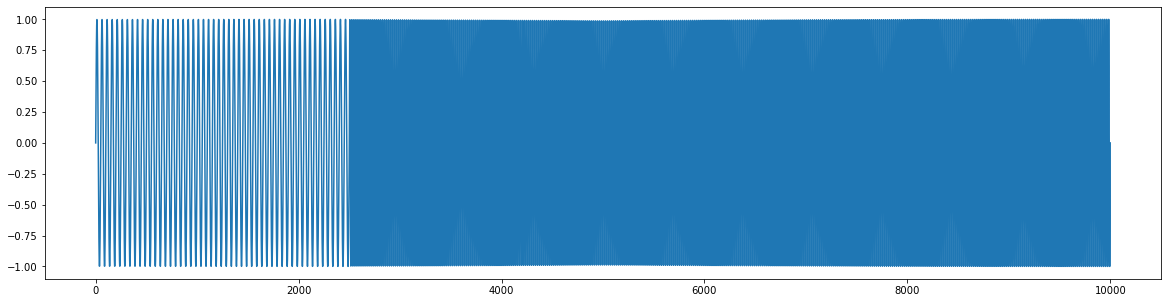

In [4]:
freq1, freq2 = 20, 50
sr = 1000
length = 10

t = np.linspace(0, length, sr * length)
x = np.concatenate((np.sin(t[:(sr * length // 4)] * 2 * np.pi * freq1),
                    np.sin(t[(sr * length // 4):] * 2 * np.pi * freq2)))

plt.figure(figsize=(20, 5))
plt.plot(x)
plt.show()

In [5]:
frame_size = 400
hop_size = 25

num_frames = (x.size - frame_size) // hop_size

stft = np.zeros((frame_size, num_frames), dtype=complex)

for frame_index in range(num_frames):
    
    start_i = frame_index * hop_size
    stop_i = start_i + frame_size
    frame = x[start_i:stop_i]
    
    stft[:, frame_index] = own_dft(frame)

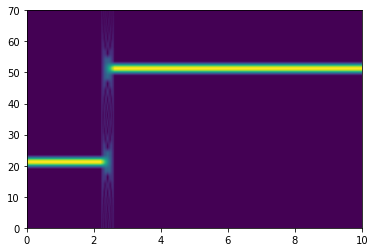

In [6]:
plt.imshow(np.abs(stft), aspect='auto', origin='lower', extent=[0, length, 0, sr])
plt.ylim(0, 70)
plt.show()

In [7]:
def calc_f_coef(sr, N, k):
    return k * sr / N

N, sr = 500, 1000
print('N: %i\tsr: %i\tfreq-res: %.2f Hz' % (N, sr, calc_f_coef(sr=sr, N=N, k=1)))

N, sr = 400, 1000
print('N: %i\tsr: %i\tfreq-res: %.2f Hz' % (N, sr, calc_f_coef(sr=sr, N=N, k=1)))

N, sr = 200, 1000
print('N: %i\tsr: %i\tfreq-res: %.2f Hz' % (N, sr, calc_f_coef(sr=sr, N=N, k=1)))

N, sr = 100, 1000
print('N: %i\tsr: %i\tfreq-res: %.2f Hz' % (N, sr, calc_f_coef(sr=sr, N=N, k=1)))

N, sr = 1000, 2000
print('N: %i\tsr: %i\tfreq-res: %.2f Hz' % (N, sr, calc_f_coef(sr=sr, N=N, k=1)))

N: 500	sr: 1000	freq-res: 2.00 Hz
N: 400	sr: 1000	freq-res: 2.50 Hz
N: 200	sr: 1000	freq-res: 5.00 Hz
N: 100	sr: 1000	freq-res: 10.00 Hz
N: 1000	sr: 2000	freq-res: 2.00 Hz


In [8]:
# f (t)=sin(800πt)+sin(900πt)+δ (t − 0.45)+δ (t − 0.5)

In [9]:
# dft-matrix --> fft